In [1]:
import os
from glob import glob
import pandas as pd
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

In [2]:
parent_folder = r"C:\Users\rfgla\Documents\Ray\telerehab_exercise_feedback\data\SkeletonData\SkeletonData\Simplified"  # Path to folder containing the data
save_folder = r"C:\Users\rfgla\Documents\Ray\telerehab_exercise_feedback\data\skeleton_data_sorted"  # Path where folders will be saved to
k = 10  # number of folds for k-fold cross-validation
num_timesteps = 100  # number of timesteps to set in training data

In [3]:
# Create shuffled list of fnames
np.random.seed(1234)
paths = glob(parent_folder + "\*.txt")
np.random.shuffle(np.array(paths))

In [4]:
# Create folders for each fold
for this_k in range(k):
    folder_path = os.path.join(save_folder, f"fold_{this_k}")
    if not os.path.exists(folder_path):
        os.mkdir(folder_path)

In [5]:
# Create storage for number of incorrect and correct repetitions of each gesture in each fold
gestures = ["EFL", "EFR", "SFL", "SFR", "SAL", "SAR", "SFE", "STL", "STR"]
demo = [[[0, 0] for g in gestures] for this_k in range(k)]

In [6]:
# Go through all files and compile into one dataframe
train_df = pd.DataFrame()  # holds sequences of num_timesteps timepoints
count = 0
for t, this_path in tqdm(enumerate(paths)):
    fname, ext = os.path.splitext(os.path.split(this_path)[1])
    if ext != ".txt":
        continue

    this_fold = t % k
    patient_id, date_id, gesture_label, repetition_id, correct_label, position = fname.split("_")
    if int(correct_label) == 3:  # Poorly performed gestures
        continue

    joint_positions = pd.read_csv(this_path, header=None)
    n_rows = len(joint_positions)
    joint_positions['patient_id'] = [int(patient_id) for _ in range(n_rows)]
    joint_positions['gesture_label'] = [int(gesture_label) for _ in range(n_rows)]
    joint_positions['repetition_id'] = [int(repetition_id) for _ in range(n_rows)]
    joint_positions['correct_label'] = [int(correct_label) - 1 for _ in range(n_rows)]
    joint_positions['position'] = [position for _ in range(n_rows)]
    joint_positions['frame'] = [_ for _ in range(n_rows)]
    joint_positions['number'] = [count for _ in range(n_rows)]
    joint_positions['fold'] = [this_fold for _ in range(n_rows)]

    demo[this_fold][int(gesture_label)][int(correct_label) - 1] += 1

    n_frames = len(joint_positions)
    if n_frames < num_timesteps:  # play sequence reversed until n_frames = 100
        joint_positions_reversed = joint_positions[::-1]
        for n_recurr in range(num_timesteps // n_frames):
            joint_positions = pd.concat([joint_positions, joint_positions_reversed], ignore_index=True)
            joint_positions_reversed = joint_positions_reversed[::-1]
        joint_positions = joint_positions[:num_timesteps]
        joint_positions['frame'][:] = range(num_timesteps)
        train_df = pd.concat([train_df, joint_positions], ignore_index=True)
        count += 1
    else:
        n_clips = n_frames // num_timesteps
        n_leftover_frames = n_frames % num_timesteps
        separation = n_leftover_frames // n_clips
        for this_clip in range(n_clips):
            start_index = this_clip*num_timesteps + separation*this_clip
            this_joint_positions = joint_positions.loc[start_index:start_index+num_timesteps - 1]  # pd dataframes include both start and end points
            this_joint_positions['frame'][:] = range(len(this_joint_positions))
            this_joint_positions['number'][:] = [count for _ in range(len(this_joint_positions))]
            train_df = pd.concat([train_df, this_joint_positions], ignore_index=True)
            count += 1


11it [00:00, 100.15it/s]C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['frame'][:] = range(len(this_joint_positions))
C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['number'][:] = [count for _ in range(len(this_joint_positions))]
22it [00:00, 105.36it/s]

101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1


C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['frame'][:] = range(len(this_joint_positions))
C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['number'][:] = [count for _ in range(len(this_joint_positions))]
33it [00:00, 99.33it/s] 

101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1


44it [00:00, 101.97it/s]C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['frame'][:] = range(len(this_joint_positions))
C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['number'][:] = [count for _ in range(len(this_joint_positions))]
55it [00:00, 95.33it/s] 

101
1
101
1
101
1
101
1
101
2
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1


65it [00:00, 93.89it/s]C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['frame'][:] = range(len(this_joint_positions))
C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['number'][:] = [count for _ in range(len(this_joint_positions))]
75it [00:00, 89.82it/s]

101
1
101
1
101
1
101
1
101
1
101
1
101
2
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1


C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['frame'][:] = range(len(this_joint_positions))
C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['number'][:] = [count for _ in range(len(this_joint_positions))]
C:\Users\rfgla\AppData\Local\Temp\ipykernel_12256\3498791472.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/u

101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1
101
1


119it [00:01, 95.66it/s]

101
1
101
1
101
1
101
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1


139it [00:01, 88.42it/s]

102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1


150it [00:01, 92.32it/s]

102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1


170it [00:01, 88.83it/s]

102
2
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1


190it [00:02, 83.95it/s]

102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1
102
1


199it [00:02, 91.84it/s]


102
1
102
1
102
1
102
1
102
1
102
1
102
1


KeyboardInterrupt: 

In [ ]:
# Plot number of correct and incorrect repetitions for each gesture in each fold
for this_k, this_fold in enumerate(demo):
    for g, this_gesture in enumerate(this_fold):
        plt.bar([g - 0.25], [this_gesture[0]], label=f"{gestures[g]} correct")
        plt.bar([g + 0.25], [this_gesture[1]], label=f"{gestures[g]} incorrect")
    plt.show()

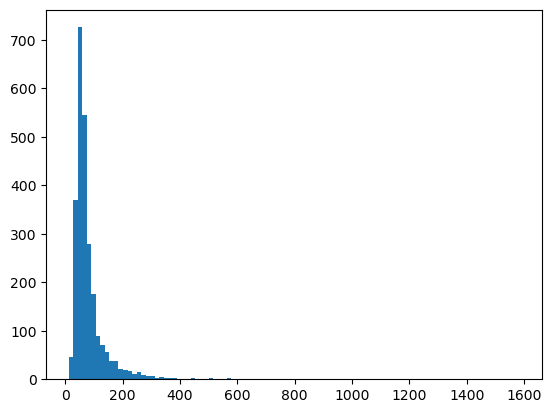

In [21]:
# See distribution of number of frames per video
n_frames = []
for this_repetition in np.unique(df['number']):
    repetition_frames = df[df['number'] == this_repetition]
    n_frames.append(np.max(repetition_frames['frame']))
plt.hist(n_frames, bins=100)
plt.show()

In [64]:
for this_k in range(k):
    this_test_df = train_df[train_df['fold'] == this_k]
    this_train_df = train_df[train_df['fold'] != this_k]

    test_y_df = this_test_df[this_test_df['frame'] == 0]
    test_y_df = test_y_df['correct_label']
    train_y_df = this_train_df[this_train_df['frame'] == 0]
    train_y_df = train_y_df['correct_label']

    this_train_df.to_csv(os.path.join(save_folder, f"fold_{this_k}", "train_x.csv"), header=None, index=False)
    train_y_df.to_csv(os.path.join(save_folder, f"fold_{this_k}", "train_y.csv"), header=None, index=False)
    test_y_df.to_csv(os.path.join(save_folder, f"fold_{this_k}", "test_y.csv"), header=None, index=False)
    this_test_df.to_csv(os.path.join(save_folder, f"fold_{this_k}", "test_x.csv"), header=None, index=False)

In [65]:
# Save by fold with y = gesture class
save_folder = r"C:\Users\rfgla\Documents\Ray\telerehab_exercise_feedback\data\skeleton_data_gesture_sorted"
for this_k in range(k):
    fold_folder = os.path.join(save_folder, f"fold_{this_k}")
    if not os.path.exists(fold_folder):
        os.mkdir(fold_folder)
    this_test_df = train_df[train_df['fold'] == this_k]
    this_train_df = train_df[train_df['fold'] != this_k]

    test_y_df = this_test_df[this_test_df['frame'] == 0]
    test_y_df = test_y_df['gesture_label']
    train_y_df = this_train_df[this_train_df['frame'] == 0]
    train_y_df = train_y_df['gesture_label']

    this_train_df.to_csv(os.path.join(save_folder, f"fold_{this_k}", "train_x.csv"), header=None, index=False)
    train_y_df.to_csv(os.path.join(save_folder, f"fold_{this_k}", "train_y.csv"), header=None, index=False)
    test_y_df.to_csv(os.path.join(save_folder, f"fold_{this_k}", "test_y.csv"), header=None, index=False)
    this_test_df.to_csv(os.path.join(save_folder, f"fold_{this_k}", "test_x.csv"), header=None, index=False)

In [68]:
# Organize into folders based on gesture class, with y = correct label
save_folder = r"C:\Users\rfgla\Documents\Ray\telerehab_exercise_feedback\data\skeleton_data_gesture_correct_sorted"
gestures = ["EFL", "EFR", "SFL", "SFR", "SAL", "SAR", "SFE", "STL", "STR"]
for this_k in range(k):
    fold_test_df = train_df[train_df['fold'] == this_k]
    fold_train_df = train_df[train_df['fold'] != this_k]
    fold_folder = os.path.join(save_folder, f"fold_{this_k}")
    if not os.path.exists(fold_folder):
        os.mkdir(fold_folder)
    for this_gesture in range(len(np.unique(train_df['gesture_label']))):
        gesture_folder = os.path.join(fold_folder, gestures[this_gesture])
        if not os.path.exists(gesture_folder):
            os.mkdir(gesture_folder)

        this_test_df = fold_test_df[fold_test_df['gesture_label'] == this_gesture]
        this_train_df = fold_train_df[fold_train_df['gesture_label'] == this_gesture]

        test_y_df = this_test_df[this_test_df['frame'] == 0]
        test_y_df = test_y_df['correct_label']
        train_y_df = this_train_df[this_train_df['frame'] == 0]
        train_y_df = train_y_df['correct_label']

        this_train_df.to_csv(os.path.join(gesture_folder, "train_x.csv"), header=None, index=False)
        train_y_df.to_csv(os.path.join(gesture_folder, "train_y.csv"), header=None, index=False)
        test_y_df.to_csv(os.path.join(gesture_folder, "test_y.csv"), header=None, index=False)
        this_test_df.to_csv(os.path.join(gesture_folder, "test_x.csv"), header=None, index=False)


In [78]:
from sklearn.preprocessing import StandardScaler
def flip_coords(positions_df, body_parts):  # flip x-coordinates in sample around central x-coord as well as change right identities to left
    # Flip x-coords around central coordinate
    positions_array = positions_df.to_numpy()
    x_coords = positions_df.iloc[:, ::3].to_numpy()
    x_coords_flattened = np.reshape(x_coords.flatten(), (x_coords.size, 1))
    sc = StandardScaler()
    x_coords_flipped = sc.fit_transform(x_coords_flattened)
    x_coords_flipped = -x_coords_flipped
    x_coords_flipped = sc.inverse_transform(x_coords_flipped)
    x_coords_flipped = np.reshape(x_coords_flipped, x_coords.shape)
    positions_array[:, ::3] = x_coords_flipped
    new_positions_df = pd.DataFrame(positions_array)


    # Change right identities to left
    col_list = list(new_positions_df)
    col_list_copy = col_list.copy()
    for b, this_part in enumerate(body_parts):
        if this_part.endswith('Right'):
            right_index = b * 3  # index of x position for right body part
            left_index = body_parts.index(this_part.split("_")[0] + "_Left") * 3
            col_list[right_index:right_index + 3], col_list[left_index:left_index + 3] = col_list[
                                                                                         left_index:left_index + 3], col_list[
                                                                                                                     right_index:right_index + 3]
    new_positions_df = new_positions_df.iloc[:, col_list]
    new_positions_df.columns = col_list_copy
    return new_positions_df


In [81]:
# Go through all files and compile into one dataframe, combining left and right variants into the same category
train_df = pd.DataFrame()  # holds sequences of num_timesteps timepoints
count = 0
body_parts = ["Spine_Base", "Spine_Mid", "Neck", "Head", "Shoulder_Left", "Elbow_Left", "Wrist_Left", "Hand_Left", "Shoulder_Right", "Elbow_Right", "Wrist_Right", "Hand_Right", "Hip_Left", "Knee_Left", "Ankle_Left", "Foot_Left", "Hip_Right", "Knee_Right", "Ankle_Right", "Foot_Right", "Spine_Shoulder", "Tip_Left", "Thumb_Left", "Tip_Right", "Thumb_Right"
]
gestures = ["EFL", "EFR", "SFL", "SFR", "SAL", "SAR", "SFE", "STL", "STR"]
gestures_combined = ["EF", "SF", "SA", "SFE", "ST"]

for t, this_path in tqdm(enumerate(paths)):
    fname, ext = os.path.splitext(os.path.split(this_path)[1])
    if ext != ".txt":
        continue

    this_fold = t % k
    patient_id, date_id, og_gesture_label, repetition_id, correct_label, position = fname.split("_")
    if int(correct_label) == 3:  # Poorly performed gestures
        continue

    joint_positions = pd.read_csv(this_path, header=None)

    # Flip right-side variants to left-side variants
    gesture_name = gestures[int(og_gesture_label)]
    if gesture_name.endswith("R"):
        joint_positions = flip_coords(joint_positions, body_parts)
    # Change gesture labels
    if gesture_name.endswith("R") or gesture_name.endswith("L"):
        gesture_name = gesture_name[:-1]
    gesture_label = str(gestures_combined.index(gesture_name))

    n_rows = len(joint_positions)
    joint_positions['patient_id'] = [int(patient_id) for _ in range(n_rows)]
    joint_positions['gesture_label'] = [int(gesture_label) for _ in range(n_rows)]
    joint_positions['repetition_id'] = [int(repetition_id) for _ in range(n_rows)]
    joint_positions['correct_label'] = [int(correct_label) - 1 for _ in range(n_rows)]
    joint_positions['position'] = [position for _ in range(n_rows)]
    joint_positions['frame'] = [_ for _ in range(n_rows)]
    joint_positions['number'] = [count for _ in range(n_rows)]
    joint_positions['fold'] = [this_fold for _ in range(n_rows)]
    joint_positions['og_gesture_label'] = [int(og_gesture_label) for _ in range(n_rows)]

    n_frames = len(joint_positions)
    if n_frames < num_timesteps:  # play sequence reversed until n_frames = 100
        joint_positions_reversed = joint_positions[::-1]
        for n_recurr in range(num_timesteps // n_frames):
            joint_positions = pd.concat([joint_positions, joint_positions_reversed], ignore_index=True)
            joint_positions_reversed = joint_positions_reversed[::-1]
        joint_positions = joint_positions[:num_timesteps]
        joint_positions['frame'][:] = range(num_timesteps)
        train_df = pd.concat([train_df, joint_positions], ignore_index=True)
        count += 1
    else:
        n_clips = n_frames // num_timesteps
        n_leftover_frames = n_frames % num_timesteps
        separation = n_leftover_frames // n_clips
        for this_clip in range(n_clips):
            start_index = this_clip*num_timesteps + separation*this_clip
            this_joint_positions = joint_positions.loc[start_index:start_index+num_timesteps - 1]  # pd dataframes include both start and end points
            this_joint_positions['frame'][:] = range(len(this_joint_positions))
            this_joint_positions['number'][:] = [count for _ in range(len(this_joint_positions))]
            train_df = pd.concat([train_df, this_joint_positions], ignore_index=True)
            count += 1

11it [00:00, 103.81it/s]C:\Users\rfgla\AppData\Local\Temp\ipykernel_11612\281086868.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['frame'][:] = range(len(this_joint_positions))
C:\Users\rfgla\AppData\Local\Temp\ipykernel_11612\281086868.py:59: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  this_joint_positions['number'][:] = [count for _ in range(len(this_joint_positions))]
22it [00:00, 96.31it/s] C:\Users\rfgla\AppData\Local\Temp\ipykernel_11612\281086868.py:58: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: h

In [82]:
# Organize into folders based on gesture class, with y = correct label
save_folder = r"C:\Users\rfgla\Documents\Ray\telerehab_exercise_feedback\data\skeleton_data_gestures_combined_correct_sorted"
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
gestures = ["EF", "SF", "SA", "SFE", "ST"]
for this_k in range(k):
    fold_test_df = train_df[train_df['fold'] == this_k]
    fold_train_df = train_df[train_df['fold'] != this_k]
    fold_folder = os.path.join(save_folder, f"fold_{this_k}")
    if not os.path.exists(fold_folder):
        os.mkdir(fold_folder)
    for this_gesture in range(len(np.unique(train_df['gesture_label']))):
        gesture_folder = os.path.join(fold_folder, gestures[this_gesture])
        if not os.path.exists(gesture_folder):
            os.mkdir(gesture_folder)

        this_test_df = fold_test_df[fold_test_df['gesture_label'] == this_gesture]
        this_train_df = fold_train_df[fold_train_df['gesture_label'] == this_gesture]

        test_y_df = this_test_df[this_test_df['frame'] == 0]
        test_y_df = test_y_df['correct_label']
        train_y_df = this_train_df[this_train_df['frame'] == 0]
        train_y_df = train_y_df['correct_label']

        this_train_df.to_csv(os.path.join(gesture_folder, "train_x.csv"), header=None, index=False)
        train_y_df.to_csv(os.path.join(gesture_folder, "train_y.csv"), header=None, index=False)
        test_y_df.to_csv(os.path.join(gesture_folder, "test_y.csv"), header=None, index=False)
        this_test_df.to_csv(os.path.join(gesture_folder, "test_x.csv"), header=None, index=False)

In [83]:
# Organize all data into folders based on gesture class, with y = correct label (not based on fold)
save_folder = r"C:\Users\rfgla\Documents\Ray\telerehab_exercise_feedback\data\skeleton_data_gestures_combined"
if not os.path.exists(save_folder):
    os.mkdir(save_folder)
gestures = ["EF", "SF", "SA", "SFE", "ST"]
for this_gesture in range(len(np.unique(train_df['gesture_label']))):
    gesture_folder = os.path.join(save_folder, gestures[this_gesture])
    if not os.path.exists(gesture_folder):
        os.mkdir(gesture_folder)

    this_train_df = train_df[train_df['gesture_label'] == this_gesture]

    train_y_df = this_train_df[this_train_df['frame'] == 0]
    train_y_df = train_y_df['correct_label']

    this_train_df.to_csv(os.path.join(gesture_folder, "train_x.csv"), header=None, index=False)
    train_y_df.to_csv(os.path.join(gesture_folder, "train_y.csv"), header=None, index=False)